In [1]:
#Plotting hBN gas phase nanoparticle data on and off
import nplab.datafile as df

In [1]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})
%matplotlib inline
import nplab.datafile as df
import scipy.signal as sig
import scipy.constants as const
import peakutils
import numpy as np
import datetime
from peakutils.plot import plot as pplot
from parula import cm_data
from matplotlib.colors import LinearSegmentedColormap 
from matplotlib.collections import LineCollection
import os
import Alexsdatafuncs
import matplotlib.cm as cm
import time
import scipy.integrate as integrate
import scipy.special as special

ImportError: No module named nplab.datafile

In [123]:
data_f.close()

In [124]:
data_f_2.close()

In [111]:

colours_1 = cm.viridis(np.linspace(0,1,500))
colours_2 = cm.hot(np.linspace(0,1,500))


In [2]:
data_f = df.open_file(set_current = False)
fname = data_f.filename

C:/Users/alexc/OneDrive - University Of Cambridge/Documents/PhD Project/Projects/Boron Nitride spacer/Embedded hBN on Au/Fresh_Start_CVD_hBN in Au/2018-10-26_maybe_gp_nps.h5


In [3]:
data_f_2 = df.open_file(set_current = False)
fname_2 = data_f_2.filename

C:/Users/alexc/OneDrive - University Of Cambridge/Documents/PhD Project/Projects/Boron Nitride spacer/Embedded hBN on Au/Fresh_Start_CVD_hBN in Au/2018-10-26_maybe_gp_nps_off_hBN.h5


In [71]:
df_data_r = data_f['OceanOpticsSpectrometer']

In [72]:
df_data_r_2 = data_f_2['OceanOpticsSpectrometer']

In [80]:
wl = df_data_r.values()[0].attrs['wavelengths']
bg = df_data_r.values()[0].attrs['background']
ref = df_data_r.values()[0].attrs['reference']
bg_2 = df_data_r_2.values()[0].attrs['background']
ref_2 = df_data_r_2.values()[0].attrs['reference']

df_data = []
for i in range (0, len(df_data_r.values())):
    df = (df_data_r.values()[i].value - bg)/(ref-bg)
    df_data.append(df)

df_data_2 = []
for i in range (0, len(df_data_r_2.values())):
    df_2 = (df_data_r_2.values()[i].value - bg_2)/(ref_2-bg_2)
    df_data_2.append(df_2)   

C:\Users\alexc\Anaconda2\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in divide
  


In [85]:
df_data_av = np.mean(df_data, axis=0)
df_data_2_av = np.mean(df_data_2, axis=0)

In [90]:
df_data_std = np.std(df_data, axis=0)/np.sqrt(len(df_data))
df_data_2_std = np.std(df_data_2, axis=0)/np.sqrt(len(df_data_2))

Text(0.5,0,u'Wavelength (nm)')

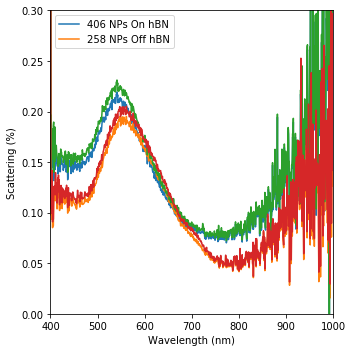

In [92]:
fig1, ax1 = plt.subplots(1, figsize = (5,5))
ax1.plot(wl, df_data_av*100, label = "406 NPs On hBN")
ax1.plot(wl, df_data_2_av*100, label = "258 NPs Off hBN")
ax1.plot(wl, df_data_av*100 + df_data_std*100)
ax1.plot(wl, df_data_2_av*100+ df_data_2_std*100)
ax1.set_ylim(0,0.3)
ax1.set_xlim(400, 1000)
ax1.legend()
ax1.set_ylabel("Scattering (%)")
ax1.set_xlabel("Wavelength (nm)")

C:\Users\alexc\Anaconda2\lib\site-packages\scipy\signal\_savitzky_golay.py:187: RankWarning: Polyfit may be poorly conditioned
  xx_edge, polyorder)
C:\Users\alexc\Anaconda2\lib\site-packages\scipy\signal\_savitzky_golay.py:187: RankWarning: Polyfit may be poorly conditioned
  xx_edge, polyorder)


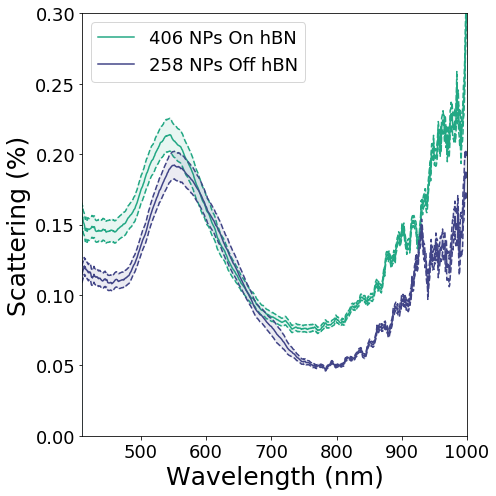

In [122]:
#Transverse mode intensities appear quite large for 60nm, as they are approximately 3-4 times what they were on TiO2

df_data_av_filt = sig.savgol_filter(df_data_av, 23, 3)
df_data_2_av_filt = sig.savgol_filter(df_data_2_av, 23, 3)
df_data_std_filt = sig.savgol_filter(df_data_std, 23, 3)
df_data_2_std_filt = sig.savgol_filter(df_data_2_std, 23, 3)

fig1, ax1 = plt.subplots(1, figsize = (7,7))
ax1.plot(wl,df_data_av_filt*100, label = "406 NPs On hBN", color=colours_1[300])
ax1.plot(wl,df_data_av_filt*100+df_data_std_filt*100, color=colours_1[300], linestyle = '--')
ax1.plot(wl,df_data_av_filt*100-df_data_std_filt*100, color=colours_1[300], linestyle = '--')
ax1.fill_between(wl, df_data_av_filt*100-df_data_std_filt*100,
                df_data_av_filt*100+df_data_std_filt*100, color = colours_1[300], 
                alpha = 0.1, zorder = 3)
ax1.plot(wl, df_data_2_av_filt*100, label = "258 NPs Off hBN", color=colours_1[100])
ax1.plot(wl,df_data_2_av_filt*100+df_data_2_std_filt*100, color=colours_1[100], linestyle = '--')
ax1.plot(wl,df_data_2_av_filt*100-df_data_2_std_filt*100, color=colours_1[100], linestyle = '--')
ax1.fill_between(wl, df_data_2_av_filt*100-df_data_2_std_filt*100,
                df_data_2_av_filt*100+df_data_2_std_filt*100, color = colours_1[100], 
                alpha = 0.1, zorder = 3)
ax1.set_ylim(0,0.3)
ax1.set_xlim(410, 1000)
ax1.legend(fontsize = 18)
ax1.set_ylabel("Scattering (%)", fontsize = 25)
ax1.set_xlabel("Wavelength (nm)",  fontsize = 25)
ax1.tick_params(axis='y', labelsize=18)
ax1.tick_params(axis='x', labelsize=18)

fig1.savefig('C:/Users/alexc/OneDrive - University Of Cambridge/Documents/PhD Project/Projects/Boron Nitride spacer/Embedded hBN on Au/Fresh_Start_CVD_hBN in Au/Avg_on_off_hBN.png', bbox_inches = 'tight')